In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# df = pd.read_csv(r'D:\1Windows\Documents\Shaju\ML\Macine_Learning\SimpleDataset\Titanic-Dataset.csv')
df=pd.read_csv(r'D:\1Windows\Documents\Shaju\ML\Macine_Learning\SimpleDataset\Titanic-Dataset.csv')                     
df_cpy = df.copy()

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Check for Duplicate Rows

In [15]:
df.duplicated().sum()

np.int64(0)

 Identify Column Data Types

In [16]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Count Unique Values in the Categorical Columns

In [17]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [18]:
df.shape[0]

891

In [19]:
round((df.isnull().sum()/df.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [20]:
df1 = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df1.dropna(subset=['Embarked'], inplace=True)
df1['Age'].fillna(df1['Age'].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_19856\56642916.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].mean(), inplace=True)


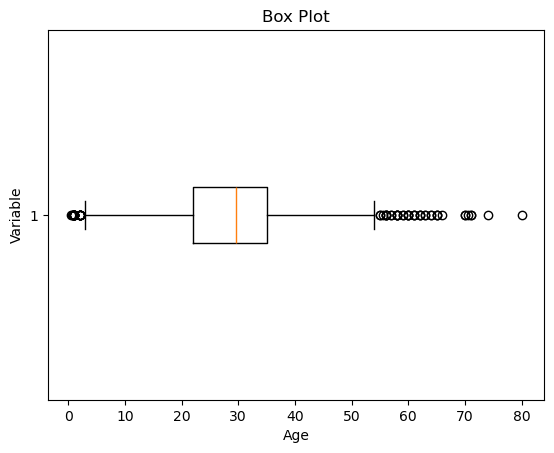

In [22]:
import matplotlib.pyplot as plt

plt.boxplot(df1['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

Calculate Outlier

In [24]:
mean=df1['Age'].mean()
std=df1['Age'].std()
lowerBoundery=mean-2*std;
upperBoundery=mean+2*std;
df2=df1[(df1['Age']>=lowerBoundery) & (df1['Age']<=upperBoundery)]
df2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.642093,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


Impute Missing Data Again if Any

In [25]:
df3 = df2.fillna(df2['Age'].mean())
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

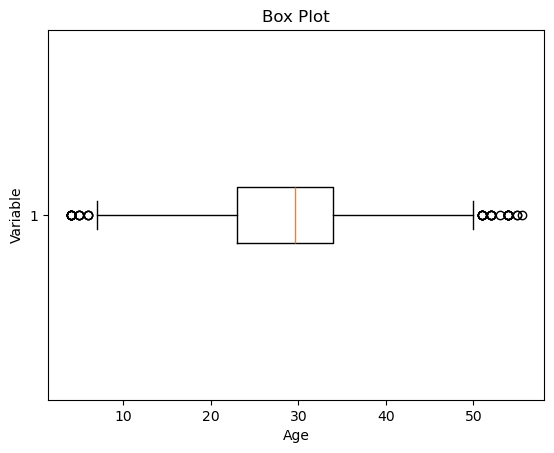

In [26]:
import matplotlib.pyplot as plt

plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

Recalculate Outlier Bounds and Remove Outliers from the Updated Data

In [27]:
mean = df3['Age'].mean()
std = df3['Age'].std()

lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

print('Lower Bound :', lower_bound)
print('Upper Bound :', upper_bound)

df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] <= upper_bound)]

Lower Bound : 8.978989004171481
Upper Bound : 49.30395961288911


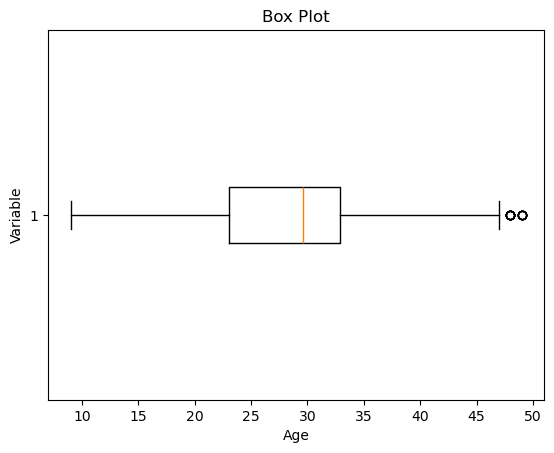

In [28]:
import matplotlib.pyplot as plt

plt.boxplot(df4['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

 Data validation and verification

In [29]:
df3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


separate independent and target features.

In [31]:
X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']

Data formatting/Labeling /

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_19856\1761829158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.349515,0.125,0.0,0.014151,S
1,0.0,female,0.660194,0.125,0.0,0.139136,C
2,1.0,female,0.427184,0.000,0.0,0.015469,S
3,0.0,female,0.601942,0.125,0.0,0.103644,S
4,1.0,male,0.601942,0.000,0.0,0.015713,S
